# Aggregrating algorithm

### Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and preprocessing the data

In [2]:
def get_data(filename):
    data = np.genfromtxt(filename)
    data = np.delete(data, [0, 1, 2, 4, 6, 8, 10], axis = 1)
    return data

In [3]:
experts_predictions = get_data("tennis1.txt")

### Algorithm

In [4]:
def AA_Brier(experts_predictions, outcomes):
    T, N = experts_predictions.shape
    weights = np.ones(N)/N
    
    # Helper functions
    def generalised_prediction(p_t, gamma_t, substitute):
        exp = np.fromiter(map(math.exp, -2 * substitute(gamma_t)), dtype = np.float)
        return -0.5 * math.log(np.dot(p_t, exp))
    
    
    predict = lambda p_t, gamma_t: 0.5 - ((generalised_prediction(p_t, gamma_t, lambda gamma: (1 - gamma)**2) 
                                          - generalised_prediction(p_t, gamma_t, lambda gamma: gamma**2)) / 2)
    
    loss = lambda outcome, prediction: (outcome - prediction)**2
    update_weights = lambda weights, loss: weights * np.fromiter(map(math.exp, -2 * loss), dtype = np.float)
    
    predictions = []
    experts_losses = []
    
    # Putting them together
    for outcome, experts_prediction in zip(outcomes, experts_predictions):
        experts_loss = np.fromiter(map(loss, outcomes, experts_prediction), dtype = np.float)
        
        p = predict(weights, experts_prediction)
        predictions.append(p)
        experts_losses.append(experts_loss)
        
        weights = update_weights(weights, experts_loss)
        weights = weights/sum(weights) # Normalise weights so they do not converge to 0
        
    return predictions, np.array(experts_losses)

In [5]:
np.random.seed(0) # for reproducibility
predictions, experts_losses = AA_Brier(experts_predictions, np.ones(experts_predictions.shape[0]))

### Total loss of the AA

In [6]:
loss = lambda outcome, prediction: (outcome - prediction)**2
aa_losses = np.fromiter(map(loss, np.ones(experts_predictions.shape[0]), predictions), dtype = np.float)
total_loss = sum(aa_losses)
print(total_loss)

1972.338412390538


### AA and Experts cumalative loss over time

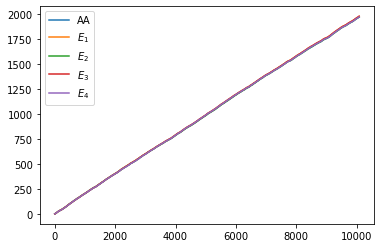

In [7]:
plt.plot(np.cumsum(aa_losses))
plt.plot(np.cumsum(experts_losses[:, 0]))
plt.plot(np.cumsum(experts_losses[:, 1]))
plt.plot(np.cumsum(experts_losses[:, 2]))
plt.plot(np.cumsum(experts_losses[:, 3]))
plt.legend(("AA", "$E_1$", "$E_2$", "$E_3$", "$E_4$"))
plt.show()

### Experts - AA loss over time

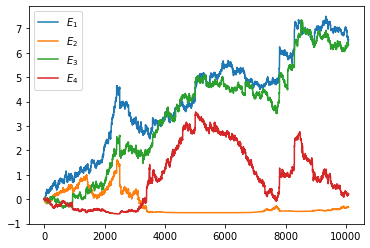

In [8]:
plt.plot(np.cumsum(experts_losses[:, 0] - aa_losses))
plt.plot(np.cumsum(experts_losses[:, 1] - aa_losses))
plt.plot(np.cumsum(experts_losses[:, 2] - aa_losses))
plt.plot(np.cumsum(experts_losses[:, 3] - aa_losses))
plt.legend(("$E_1$", "$E_2$", "$E_3$", "$E_4$"))
plt.show()

### Experts - Average loss over time

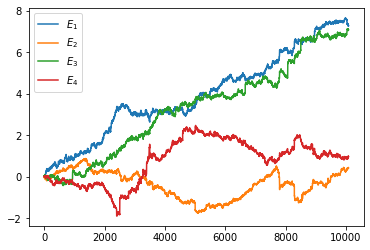

In [9]:
average_loss = np.fromiter(map(loss, np.ones(experts_predictions.shape[0]), np.sum(experts_predictions, axis = 1) * (1/4)), dtype=np.float)

plt.plot(np.cumsum(experts_losses[:, 0] - average_loss))
plt.plot(np.cumsum(experts_losses[:, 1] - average_loss))
plt.plot(np.cumsum(experts_losses[:, 2] - average_loss))
plt.plot(np.cumsum(experts_losses[:, 3] - average_loss))
plt.legend(("$E_1$", "$E_2$", "$E_3$", "$E_4$"))
plt.show()